# Simulate Trading with Random Forest Model  

This notebook is a `continuation of the stock movement prediction project` using a Random Forest model where we trained a Random Forest model to classify whether a stock price will go `Up (1)` or `Down (0)`. In this part, we simulate trading decisions based on the model’s predictions and track portfolio performance over time.

If you haven't seen the original project yet, you can explore it below:

- **Medium Article**: [How to Predict Stock Movements Using Random Forest](https://medium.com/insiderfinance/how-to-predict-stock-movements-using-random-forest-ad313dbe4aa7)  
- **GitHub Repository**: [random_forest_stock_price_prediction](https://github.com/Brianhulela/random_forest_stock_price_prediction) or check out the `train.ipynb` script in this project.

We load the trained model, apply it to new data, and simulate a simple buy/sell strategy with transaction fees to analyze how well the model performs in a realistic trading scenario.

![Cover Image](trading_simulation_2024_2025_with_return.png)

In [200]:
%pip install joblib yfinance matplotlib tabulate --quiet

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Brian\OneDrive - University of Witwatersrand\Desktop\off_the_grid\tutorials\technical_analysis\random_forest_trading_strategy\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [201]:
import joblib
import yfinance as yf
import matplotlib.pyplot as plt
from tabulate import tabulate

plt.style.use("dark_background")

## Load and Prepare Latest Market Data for Prediction

This cell downloads the most recent market data for a given stock ticker from Yahoo Finance between January 1, 2024 and May 8, 2025 using the specified time interval. It selects key features (Open, Close, Volume, Low, High) and generates a binary Direction column indicating whether the next day’s closing price will increase. After removing rows with missing values, the features are stored in df for input into the prediction model.

In [202]:
ticker = "TSLA"
interval = "1wk"

### Download Data

In [ ]:
# Load latest data for simulation
df = yf.download(ticker, start="2024-01-01", end="2025-05-08", auto_adjust=True, interval=interval)
df = df[['Open', 'Close', 'Volume', 'Low', 'High']]
df.dropna(inplace=True)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Open,Close,Volume,Low,High
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2024-01-01,250.080002,237.490005,420745500,234.899994,251.250000
2024-01-08,236.139999,218.889999,502263400,217.149994,241.250000
2024-01-15,215.100006,212.190002,429210600,207.559998,223.490005
2024-01-22,212.259995,183.250000,653348300,180.059998,217.800003
2024-01-29,185.630005,187.910004,540565200,182.000000,196.360001


### Plot Stock's Closing Price

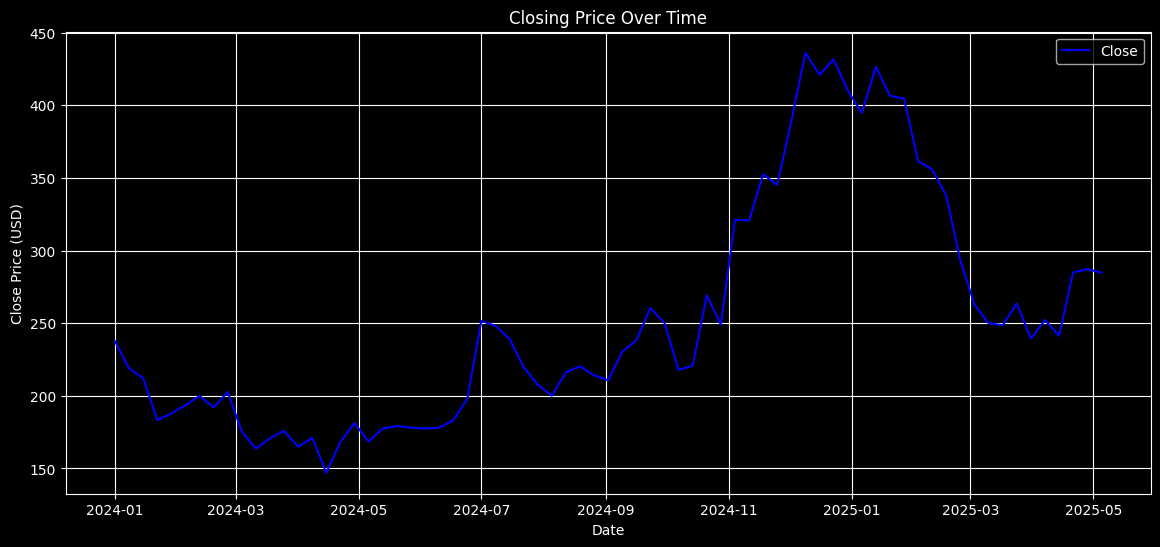

In [204]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df["Close"], label="Close", color="blue")
plt.title("Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.grid(True)
plt.savefig("Close.png")
plt.show()

## Load Saved Random Forest Model

This section loads the trained Random Forest model used for stock price movement prediction.

If you’d like to learn more about how the model was trained—including data preprocessing, feature engineering, and evaluation—please check out the full tutorial on [Medium](https://medium.com/insiderfinance/how-to-predict-stock-movements-using-random-forest-ad313dbe4aa7) and explore the complete code on [GitHub](https://github.com/Brianhulela/random_forest_stock_price_prediction).


In [205]:
# Load the model from the file
model = joblib.load('random_forest_model.pkl')

# Use it to make predictions
predictions = model.predict(df)


c:\Users\Brian\OneDrive - University of Witwatersrand\Desktop\off_the_grid\tutorials\technical_analysis\random_forest_trading_strategy\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Predict Market Direction Using Trained Model

This cell uses the trained machine learning model to predict the market direction for the latest data. The predictions are added as a new column called Prediction. The dataset is then reorganized to include only the relevant columns: Open, Close, Volume, Low, High, Direction, and Prediction.

In [206]:
# Predict using trained model
df["Prediction"] = model.predict(df)
df.columns = df.columns.get_level_values(0)
df = df[['Open', 'Close', 'Volume', 'Low', 'High', 'Prediction']]
df.head()

c:\Users\Brian\OneDrive - University of Witwatersrand\Desktop\off_the_grid\tutorials\technical_analysis\random_forest_trading_strategy\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Price,Open,Close,Volume,Low,High,Prediction
Date,,,,,,
2024-01-01,250.080002,237.490005,420745500,234.899994,251.250000,0
2024-01-08,236.139999,218.889999,502263400,217.149994,241.250000,0
2024-01-15,215.100006,212.190002,429210600,207.559998,223.490005,1
2024-01-22,212.259995,183.250000,653348300,180.059998,217.800003,1
2024-01-29,185.630005,187.910004,540565200,182.000000,196.360001,1


## Visualize Close Price with Predicted Market Directions
This cell generates a line chart to visualize the stock's close price along with the predicted market directions. Green upward-pointing triangles (^) indicate predicted upward movements, while red downward-pointing triangles (v) represent predicted downward movements. The plot helps assess how the model's predictions align with actual price trends over time. The chart is saved as a PNG file for future reference.

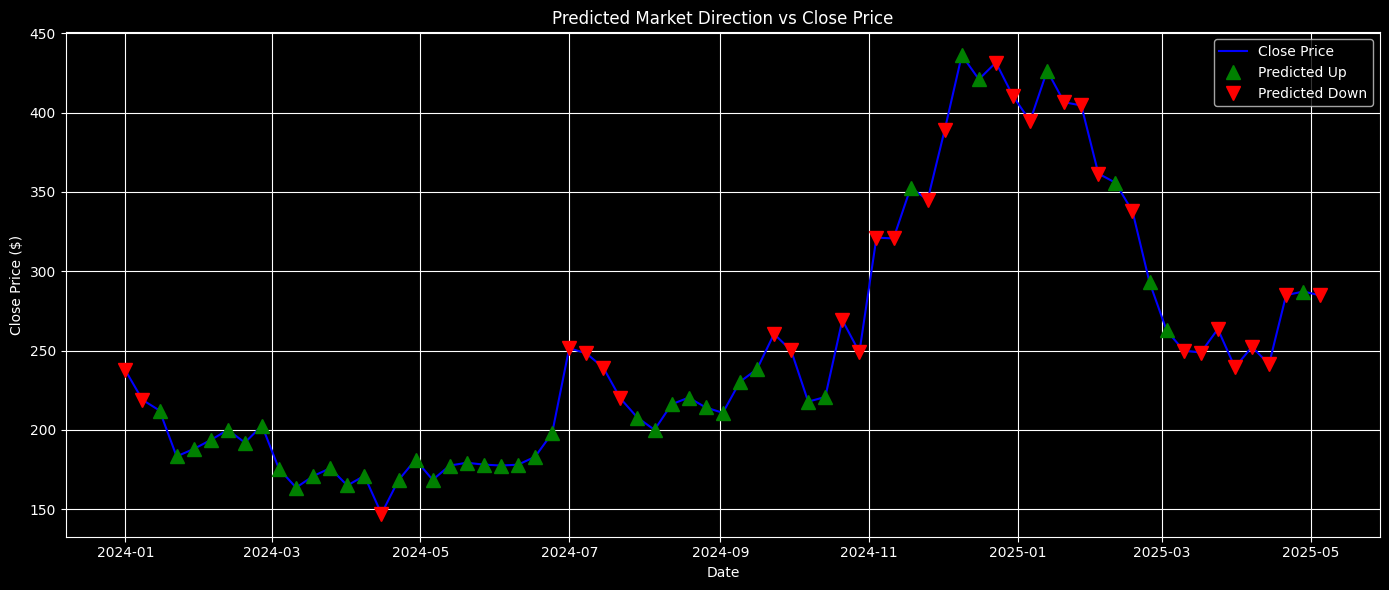

In [207]:
# Plotting Close Price and Predictions
plt.figure(figsize=(14, 6))

# Plot the Close Price for the entire period
plt.plot(df.index, df["Close"], label='Close Price', color='blue')

# Plot predicted "Up" signals (where Prediction == 1)
plt.plot(df.index[df["Prediction"] == 1], 
         df["Close"][df["Prediction"] == 1], 
         '^', markersize=10, color='g', label='Predicted Up')

# Plot predicted "Down" signals (where Prediction == 0)
plt.plot(df.index[df["Prediction"] == 0], 
         df["Close"][df["Prediction"] == 0], 
         'v', markersize=10, color='r', label='Predicted Down')

# Set the chart title and labels
plt.title("Predicted Market Direction vs Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price ($)")

# Add a legend to differentiate the signals
plt.legend()

# Show grid for better visualization
plt.grid(True)

# Save the plot as a .png file
plt.tight_layout()
plt.savefig("predicted_market_direction.png")

# Display the plot
plt.show()


## Simulate Trading Strategy Based on Model Predictions
This cell simulates a trading strategy using the model's predictions to decide when to buy or sell. Starting with a virtual cash balance of $10,000, it executes trades based on predicted market directions: buying when an upward trend is forecasted and selling when a downward trend is predicted. The simulation allows fractional share purchases and logs each trade, including action type, date, price, number of shares, return percentage, and portfolio value. The results are displayed in a formatted table for easy analysis.

In [208]:
# Simulate trading strategy
virtual_cash = 10000  # starting balance in dollars
position = 0          # total number of shares held (fractional allowed)
trade_log = []
buy_price = 0         # To track the price at which we bought shares
transaction_fee_percentage = 0.001  # 0.1% fee

# Loop through the data to simulate trading based on predictions
for i in range(len(df) - 1):
    price = df.iloc[i]["Close"]
    next_pred = int(df["Prediction"].iloc[i])  # Predict the action (1 = buy, 0 = sell)

    # Buy if predicted to go up and we have enough cash
    if next_pred == 1 and virtual_cash >= price:
        # Calculate the maximum shares we can buy after accounting for fees
        shares_bought = virtual_cash / (price * (1 + transaction_fee_percentage))
        cost = shares_bought * price
        fee = cost * transaction_fee_percentage
        total_cost = cost + fee

        virtual_cash -= total_cost  # Deduct cost including fee
        position += shares_bought
        buy_price = price

        # Calculate current portfolio value
        portfolio_value = virtual_cash + (position * price)
        trade_log.append(("BUY", df.index[i], price, shares_bought, 0, portfolio_value, fee))

    # Sell if predicted to go down and we hold shares
    elif next_pred == 0 and position > 0:
        proceeds = position * price
        fee = proceeds * transaction_fee_percentage
        net_proceeds = proceeds - fee

        virtual_cash += net_proceeds

        return_percentage = ((price - buy_price) / buy_price) * 100
        portfolio_value = virtual_cash  # After selling, only cash remains
        trade_log.append(("SELL", df.index[i], price, position, return_percentage, portfolio_value, fee))
        position = 0

# Display trade log using tabulate for better visualization
headers = ["Action", "Date", "Price", "Shares", "Return (%)", "Portfolio Value ($)", "Fee ($)"]
print(tabulate(trade_log, headers=headers, tablefmt="grid"))

+----------+---------------------+---------+----------+--------------+-----------------------+-----------+
| Action   | Date                |   Price |   Shares |   Return (%) |   Portfolio Value ($) |   Fee ($) |
+==========+=====================+=========+==========+==============+=======================+===========+
| BUY      | 2024-01-15 00:00:00 |  212.19 |  47.0805 |      0       |               9990.01 |   9.99001 |
+----------+---------------------+---------+----------+--------------+-----------------------+-----------+
| SELL     | 2024-04-15 00:00:00 |  147.05 |  47.0805 |    -30.6989  |               6916.26 |   6.92319 |
+----------+---------------------+---------+----------+--------------+-----------------------+-----------+
| BUY      | 2024-04-22 00:00:00 |  168.29 |  41.0562 |      0       |               6909.35 |   6.90935 |
+----------+---------------------+---------+----------+--------------+-----------------------+-----------+
| SELL     | 2024-07-01 00:00:00 |  2

## Calculate Final Portfolio Performance
This cell calculates the final portfolio value at the end of the trading simulation by combining the remaining virtual cash with the value of any held shares at the last closing price. It then computes the total profit or loss from the initial investment and expresses the return as a percentage. The results are printed to provide a summary of the trading strategy's overall performance.

In [209]:
# Calculate final portfolio value and return percentage
final_price = df.iloc[-1]["Close"]  # Last closing price
final_value = virtual_cash + (position * final_price)  # Final value of portfolio
profit = final_value - 10000  # Profit or loss from initial investment
return_percentage = (profit / 10000) * 100  # Return as percentage

# Print final results
print(f"Final Portfolio Value: ${final_value:.2f}")
print(f"Profit/Loss: ${profit:.2f}")
print(f"Return: {return_percentage:.2f}%")

Final Portfolio Value: $11685.71
Profit/Loss: $1685.71
Return: 16.86%


## Portfolio Value over Time

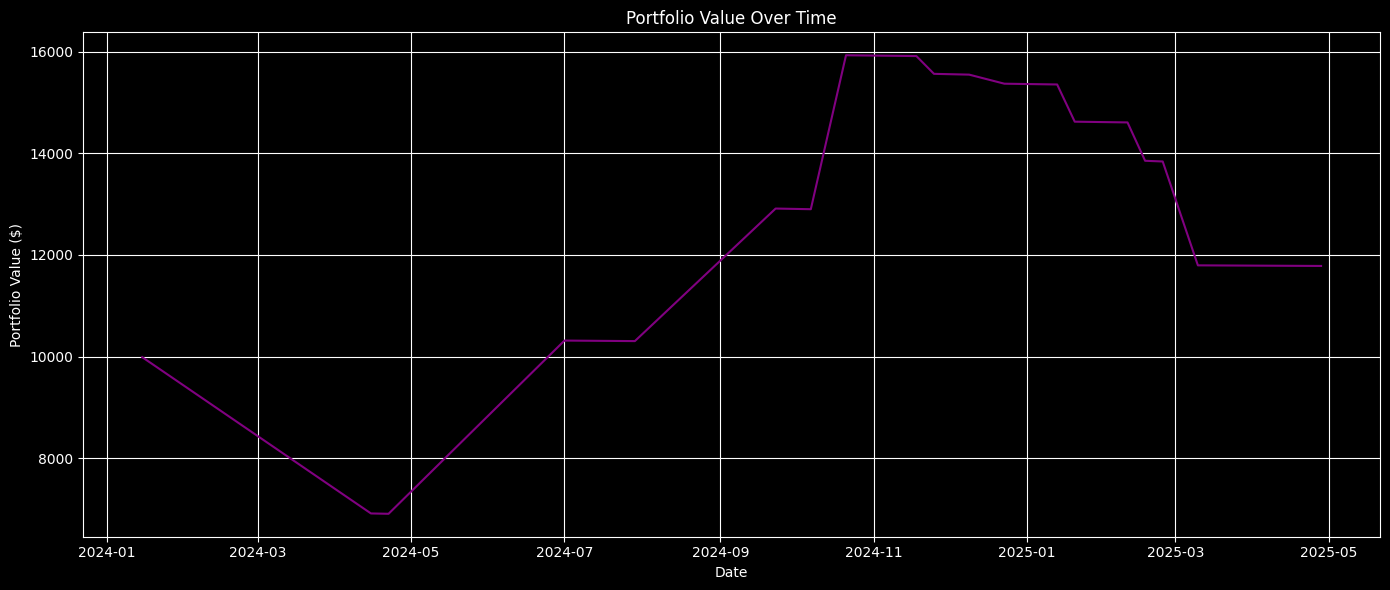

In [210]:
# After the trading loop
portfolio_values = [trade[5] for trade in trade_log]
dates = [trade[1] for trade in trade_log]

# Plot portfolio value over time
plt.figure(figsize=(14, 6))
plt.plot(dates, portfolio_values, label="Portfolio Value", color="purple")
plt.title("Portfolio Value Over Time")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.grid(True)
plt.tight_layout()
plt.savefig("portfolio_value_over_time.png")
plt.show()

## Performance Metrics (Sharpe Ratio, etc.)

In [211]:
# After final portfolio value is printed
returns = [trade[4] for trade in trade_log if trade[4] != 0]
mean_return = sum(returns) / len(returns)
stddev_return = (sum([(r - mean_return)**2 for r in returns]) / len(returns))**0.5
sharpe_ratio = mean_return / stddev_return if stddev_return != 0 else 0
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

Sharpe Ratio: 0.20


## Visualize Trading Simulation with Buy/Sell Signals
This cell plots the stock's closing price along with annotated buy and sell signals from the simulated trading strategy. Each buy action is marked with an orange circle and labeled "BUY", while each sell action is marked with a green (for profit) or red (for loss) downward triangle, annotated with the return percentage. This visualization provides a clear, time-aligned overview of how the model’s predictions translate into trading actions and outcomes.

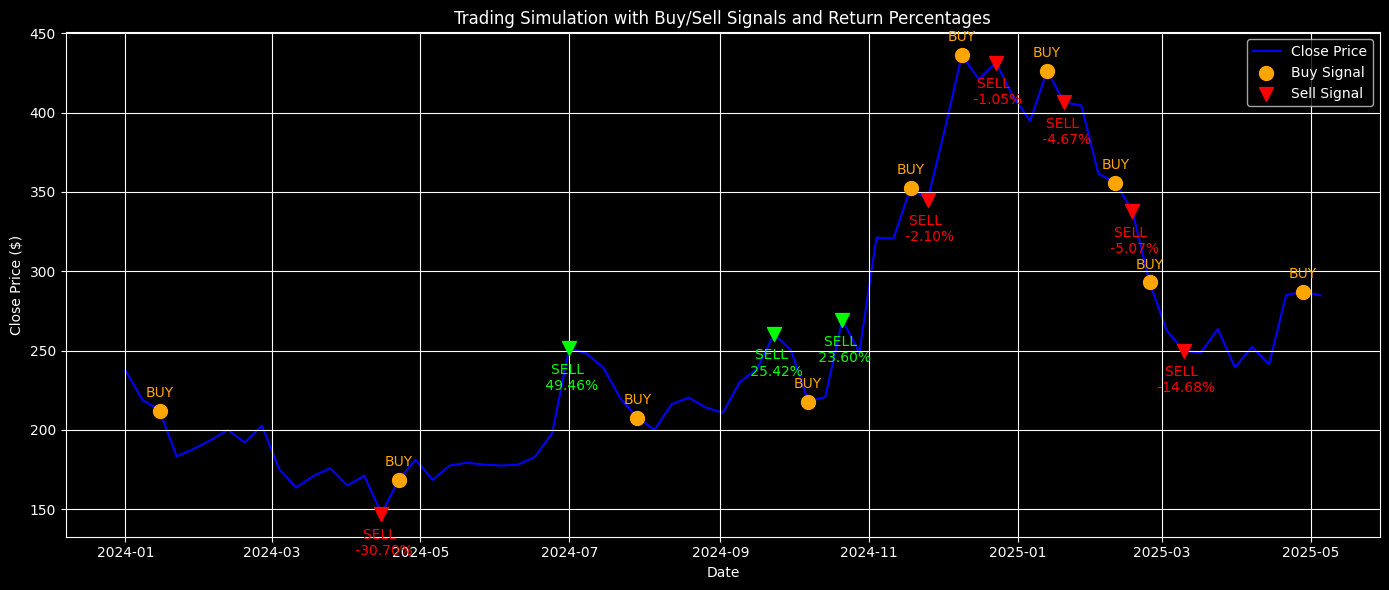

In [212]:
# Plotting Buy/Sell signals on Close price
plt.figure(figsize=(14, 6))

# Plot the Close Price with a lower zorder
plt.plot(df.index, df["Close"], label="Close Price", color="blue", zorder=1)

# Plot Buy and Sell signals with a higher zorder
for action, date, price, shares, return_pct, portfolio_value, fee in trade_log:
    if action == "BUY":
        # Scatter plot for Buy signal
        plt.scatter(date, price, marker='o', color='orange', s=100, label="Buy Signal" if 'Buy Signal' not in plt.gca().get_legend_handles_labels()[1] else "", zorder=2)
        
        plt.annotate(f"BUY", (date, price), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10, color='orange', zorder=3)

    else:
        return_color = 'lime' if return_pct > 0 else 'red'  # Green for positive return, red for negative

        # Scatter plot for Sell signal
        plt.scatter(date, price, marker='v', color=return_color, s=100, label="Sell Signal" if 'Sell Signal' not in plt.gca().get_legend_handles_labels()[1] else "", zorder=2)
        
        # Annotate with return percentage (if available)
        plt.annotate(f"SELL \n {return_pct:.2f}%", (date, price), textcoords="offset points", xytext=(0, -30), ha='center', fontsize=10, color=return_color, zorder=3)

# Set chart title and labels
plt.title("Trading Simulation with Buy/Sell Signals and Return Percentages")
plt.xlabel("Date")
plt.ylabel("Close Price ($)")

# Add legend
plt.legend()

# Add grid for better visualization
plt.grid(True)

# Tight layout to avoid clipping
plt.tight_layout()

# Save and display the plot
plt.savefig("trading_simulation_2024_2025_with_return.png")
plt.show()